In [4]:
import numpy as np
import keras
from keras import backend as K
from keras.utils import to_categorical
from keras.models import Sequential,Model,model_from_json
from keras.layers import Input,Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras. metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
import itertools
import cv2
from sklearn.utils import shuffle
%matplotlib inline

K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [5]:
dictionary = {
            0: '0',
            1: '1',
            2: '2',
            3: '3',
            4: '4',
            5: '5',
            6: '6',
            7: '7',
            8: '8',
            9: '9',
            10: 'A',
            11: 'B',
            12: 'C',
            13: 'D',
            14: 'E',
            15: 'F',
            16: 'G',
            17: 'H',
            18: 'I',
            19: 'J',
            20: 'K',
            21: 'L',
            22: 'M',
            23: 'N',
            24: 'O',
            25: 'P',
            26: 'Q',
            27: 'R',
            28: 'S',
            29: 'T',
            30: 'U',
            31: 'V',
            32: 'W',
            33: 'X',
            34: 'Y',
            35: 'Z',
            36: 'a',
            37: 'b',
            38: 'c',
            39: 'd',
            40: 'e',
            41: 'f',
            42: 'g',
            43: 'h',
            44: 'i',
            45: 'j',
            46: 'k',
            47: 'l',
            48: 'm',
            49: 'n',
            50: 'o',
            51: 'p',
            52: 'q',
            53: 'r',
            54: 's',
            55: 't',
            56: 'u',
            57: 'v',
            58: 'w',
            59: 'x',
            60: 'y',
            61: 'z',
            62: '!',
            63: '.',
            64: '?',
            65: ',',
            66: ';',
            67: ':',
            68: '-',
            69: '(',
            70: ')'
        }

In [6]:
def loadTrainImage(path):
        img = cv2.imread(path);
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = 255 - img
        img = cv2.resize(img,(32,32))
        return img
    
def loadTrainingSet():
    x_train = []
    y_train = []

    for i in range(1,63):
        folderName = "Sample"
        nrFolder = ""
        if i<=9:
            nrFolder = "00"+str(i)
        else:
            nrFolder = "0"+str(i)
        folderName = folderName + nrFolder   
        for j in range(1,1017):
            imageName = "";
            if j<=9:
                imageName = "img" + nrFolder + "-0000" + str(j)
            elif j<=99:
                imageName = "img" + nrFolder + "-000" + str(j)
            elif j<=999:
                imageName = "img" + nrFolder + "-00" + str(j)
            else:
                imageName = "img" + nrFolder + "-0" + str(j)

            image = loadTrainImage("./trainingSet/" + folderName + "/" + imageName + ".png")
            x_train.append(image)
            y_train.append(i-1)
        print("load '", dictionary[i-1],"' from ", folderName," ...")

#     for i in range(63,72):
#         folderName = "Sample0"+str(i)
#         image = loadTrainImage("./marks/" + folderName + "/1.png")
#         image = cv2.morphologyEx(image,cv2.MORPH_DILATE,np.ones((3,3),np.uint8))      
#         for j in range(1016):
#             x_train.append(image)
#             y_train.append(i-1)
#         print("load '", dictionary[i-1],"' from ", folderName," ...")
        
    x_train = np.asarray(x_train)
    
    y_train = np.asarray(y_train)
    
    x_train,y_train = shuffle(x_train,y_train)
    
    y_train = to_categorical(y_train)
    
    return (x_train,y_train)

def showImage(image,label):
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(image, cmap=plt.cm.binary)
        plt.show()

In [4]:
x_train, y_train = loadTrainingSet()

load ' 0 ' from  Sample001  ...
load ' 1 ' from  Sample002  ...
load ' 2 ' from  Sample003  ...
load ' 3 ' from  Sample004  ...
load ' 4 ' from  Sample005  ...
load ' 5 ' from  Sample006  ...
load ' 6 ' from  Sample007  ...
load ' 7 ' from  Sample008  ...
load ' 8 ' from  Sample009  ...
load ' 9 ' from  Sample010  ...
load ' A ' from  Sample011  ...
load ' B ' from  Sample012  ...
load ' C ' from  Sample013  ...
load ' D ' from  Sample014  ...
load ' E ' from  Sample015  ...
load ' F ' from  Sample016  ...
load ' G ' from  Sample017  ...
load ' H ' from  Sample018  ...
load ' I ' from  Sample019  ...
load ' J ' from  Sample020  ...
load ' K ' from  Sample021  ...
load ' L ' from  Sample022  ...
load ' M ' from  Sample023  ...
load ' N ' from  Sample024  ...
load ' O ' from  Sample025  ...
load ' P ' from  Sample026  ...
load ' Q ' from  Sample027  ...
load ' R ' from  Sample028  ...
load ' S ' from  Sample029  ...
load ' T ' from  Sample030  ...
load ' U ' from  Sample031  ...
load ' V

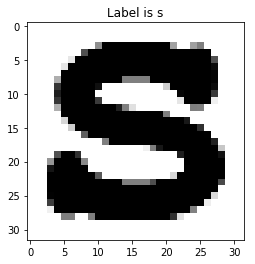

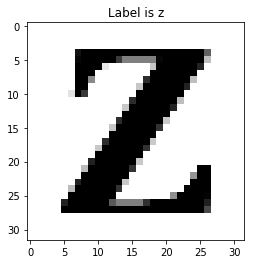

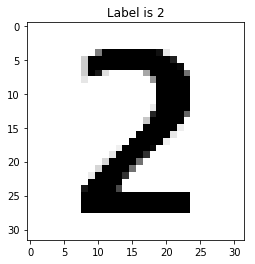

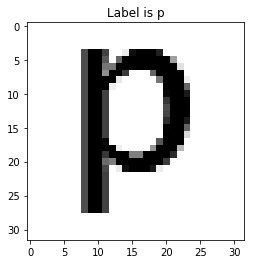

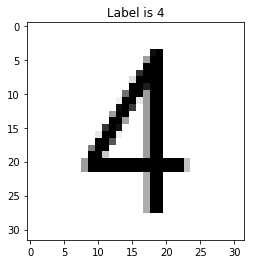

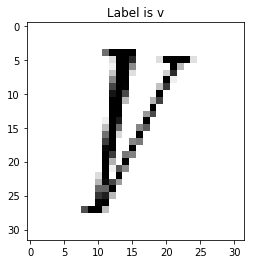

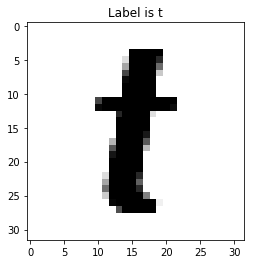

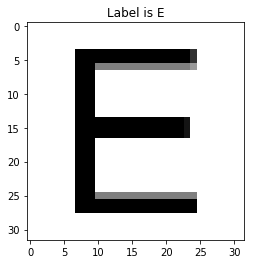

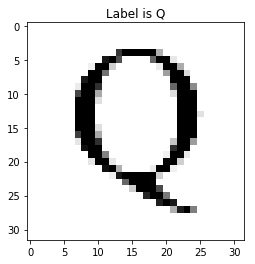

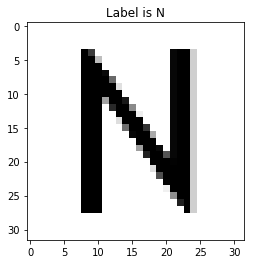

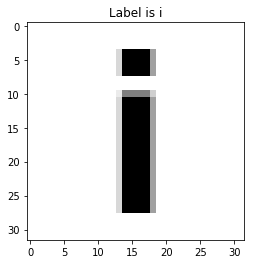

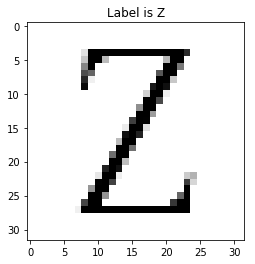

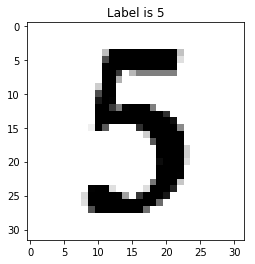

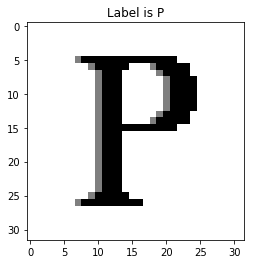

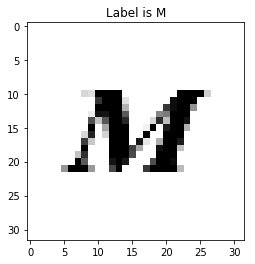

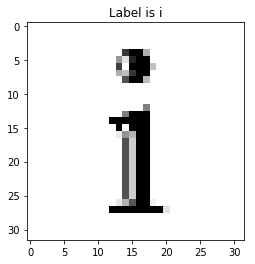

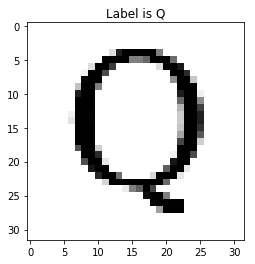

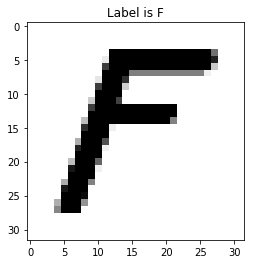

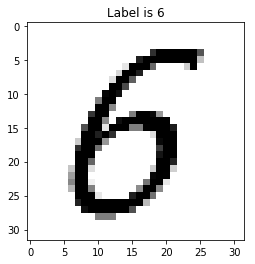

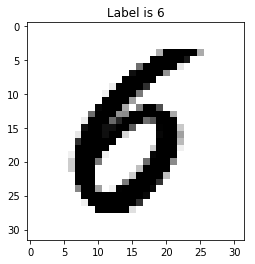

In [5]:
for i in range(20):
    image = x_train[i]
    ch = dictionary[np.argmax(y_train[i])]
    showImage(image,ch)

In [10]:
x_train = x_train.reshape(len(x_train), 32, 32,1)

# Definirea modelului

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
       
model.add(Flatten())
model.add(Dense(1984, activation='relu'))
model.add(Dense(496, activation='relu'))
model.add(Dense(62, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


# Compilarea modelului

In [7]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

# Antrenarea modelului

In [11]:
acc = []
vAcc = []
epoch = 50
for epoch in range(epoch):
    print('\nEPOCA',epoch+1,':')
    history = model.fit(x_train,y_train,validation_split=0.2, batch_size=100, epochs=1)   
    history = history.history
    currentAcc = history['acc'][0]
    currentValAcc = history['val_acc'][0]
  
    epoch = epoch + 1
    
    if currentValAcc <  (max(vAcc) if len(vAcc) != 0 else 0) - 3:
        break
    else:
        acc.append(currentAcc)
        vAcc.append(currentValAcc)
        modelJson = model.to_json()
        with open("model.json","w") as jsonFile:
            jsonFile.write(modelJson)
        model.save_weights("weights.h5")
        


EPOCA 1 :
Instructions for updating:
Use tf.cast instead.
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 101s 2ms/step - loss: 1.3511 - acc: 0.6903 - val_loss: 0.6716 - val_acc: 0.8041

EPOCA 2 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 95s 2ms/step - loss: 0.5535 - acc: 0.8313 - val_loss: 0.5415 - val_acc: 0.8300

EPOCA 3 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 99s 2ms/step - loss: 0.4045 - acc: 0.8679 - val_loss: 0.4711 - val_acc: 0.8463

EPOCA 4 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 110s 2ms/step - loss: 0.3206 - acc: 0.8910 - val_loss: 0.4284 - val_acc: 0.8598

EPOCA 5 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 101s 2ms/step - loss: 0.2638 - acc: 0.9080 -


EPOCA 41 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 71s 1ms/step - loss: 0.0503 - acc: 0.9786 - val_loss: 0.4071 - val_acc: 0.8920

EPOCA 42 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 70s 1ms/step - loss: 0.0485 - acc: 0.9792 - val_loss: 0.4363 - val_acc: 0.8898

EPOCA 43 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 71s 1ms/step - loss: 0.0482 - acc: 0.9794 - val_loss: 0.4357 - val_acc: 0.8936

EPOCA 44 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 70s 1ms/step - loss: 0.0449 - acc: 0.9806 - val_loss: 0.4240 - val_acc: 0.8936

EPOCA 45 :
Train on 50393 samples, validate on 12599 samples
Epoch 1/1
50393/50393 [==============================] - 70s 1ms/step - loss: 0.0442 - acc: 0.9806 - val_loss: 0.4342 - val_acc: 0.8886

EPOCA 46 

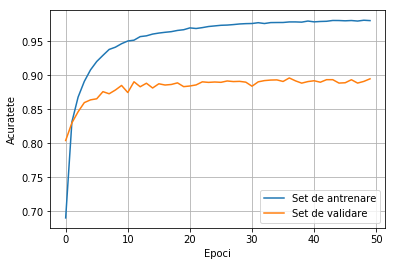

In [12]:
def drawGraph(acc,vAcc):
    plt.plot(acc, label='Set de antrenare' )
    plt.plot(vAcc, label='Set de validare')
    plt.grid()
    plt.xlabel('Epoci')
    plt.ylabel('Acuratete')
    plt.rcParams.update({'font.size': 10})
    plt.legend()
    
drawGraph(acc,vAcc)

# Evaluarea modelului

In [24]:
loss, accuracy = model.evaluate(x_train, y_train)

62992/62992 [==============================] - 23s 366us/step


In [27]:
print('loss:',loss,'\naccuracy:',accuracy)

loss: 0.10865156507606369 
accuracy: 0.9672815595631191


# Load model

In [35]:
json = open('model.json','r')
loadedModelJson = json.read()
json.close()
model = model_from_json(loadedModelJson)
model.load_weights('weights.h5')

# Realizarea de predicții

In [87]:
import glob
from PIL import Image
import substring

def loadImage(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,np.ones((4,4),np.uint8))
    width = 2
    top, bottom, left, right = [width]*4
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    image = cv2.resize(image,(32,32))
    return image

filenames = [filename for filename in glob.glob('E:/LICENTA/ocr/server/images/*.png')]

images = []
codes = []

for filename in filenames:
    image = loadImage(filename)
    images.append(image)
    
    code = substring.substringByChar(filename, startChar="\\", endChar=".png")
    code = code[1:]
    array = code.split('.')
    dictionary = {
        "row" : int(array[0]),
        "word" : int(array[1]),
        "letter" : int(array[2])
    }
    codes.append(dictionary)
    
images = np.asarray(images)

In [88]:
images = images.reshape(len(images), 32, 32,1)
predictions = model.predict_classes(images)
images = images.reshape(len(images), 32, 32)

In [89]:
dictionary = {
            0: '0',
            1: '1',
            2: '2',
            3: '3',
            4: '4',
            5: '5',
            6: '6',
            7: '7',
            8: '8',
            9: '9',
            10: 'A',
            11: 'B',
            12: 'C',
            13: 'D',
            14: 'E',
            15: 'F',
            16: 'G',
            17: 'H',
            18: 'I',
            19: 'J',
            20: 'K',
            21: 'L',
            22: 'M',
            23: 'N',
            24: 'O',
            25: 'P',
            26: 'Q',
            27: 'R',
            28: 'S',
            29: 'T',
            30: 'U',
            31: 'V',
            32: 'W',
            33: 'X',
            34: 'Y',
            35: 'Z',
            36: 'a',
            37: 'b',
            38: 'c',
            39: 'd',
            40: 'e',
            41: 'f',
            42: 'g',
            43: 'h',
            44: 'i',
            45: 'j',
            46: 'k',
            47: 'l',
            48: 'm',
            49: 'n',
            50: 'o',
            51: 'p',
            52: 'q',
            53: 'r',
            54: 's',
            55: 't',
            56: 'u',
            57: 'v',
            58: 'w',
            59: 'x',
            60: 'y',
            61: 'z',
        }

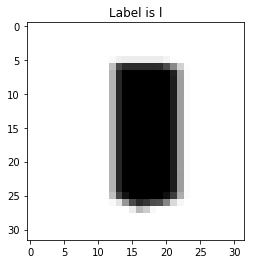

In [90]:
showImage(images[0],dictionary[predictions[0]])

In [91]:
text = ""
previousRow = 0
previousWord = 0

for i in range(len(predictions)):
    letter = dictionary[predictions[i]]
    if codes[i]['row'] != previousRow:
        text = text + "\n"
        previousRow = codes[i]['row']
        previousWord =0
    if codes[i]['word'] != previousWord:
        text = text + " "
        previousWord = codes[i]['word']      
    text = text + letter
array = text.split(" ")

for i in range(len(array)):
    if array[i][0].islower():
        array[i] = array[i].lower()

In [92]:
print(text)

ln C0mputer sCienCej digitab image prOcessing is the use 0f C0mputer ajg0rithms to ped0rm image pr0Cessing On digita1 imagesi As g subCateg0D 0r fiejd of digital
signa1 pr0CeSsingj digitaj image pr0Cessing has many Qdvantages over anajOg image pr0CesSingi jt aij0Ws a muCh Wider rgnge Of ajgorithms tO be applied tO the input
data and CQn av0id pr0bjems suCh aS the buildfup Of n0iSe qnd siQna1 distOHiOn during prOceSsingi sinCe images are defined over wO dimensi0ns Cperhaps mOreD
diq4ital imgq4e prOCessinq4 mav be mOdejed in the f0rm Of mUjtidimensi0nal svstemsd


In [93]:
from spellchecker import SpellChecker

spell = SpellChecker(distance=1)

# misspelled = spell.unknown(array)

output = ""
for i in range(len(array)):
    output = output + spell.correction(array[i]) + " "
print(output)

ln computer science digital image processing is the use of computer ajg0rithms to ped0rm image processing On digital images As g subcateg0d or field of digital
signa1 pr0cessingj digital image processing has many advantages over analog image pr0cessingi jt aij0ws a much Wider range Of algorithms to be applied to the input
data and can avoid pr0bjems such as the build-up Of noise and siqna1 distohion during processing since images are defined over wo dimensions perhaps mored
diq4ital imgq4e processinq4 may be modejed in the form Of mujtidimensi0nal svstemsd 
